**Importing required libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

import warnings
warnings.filterwarnings('ignore')

Reading data

In [2]:
train=pd.read_csv('../input/bike-sharing-demand/train.csv', parse_dates = ['datetime'])
test=pd.read_csv('../input/bike-sharing-demand/test.csv', parse_dates = ['datetime'])
sampsub = pd.read_csv("../input/bike-sharing-demand/sampleSubmission.csv")

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.shape

(10886, 12)

In [5]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

<AxesSubplot:>

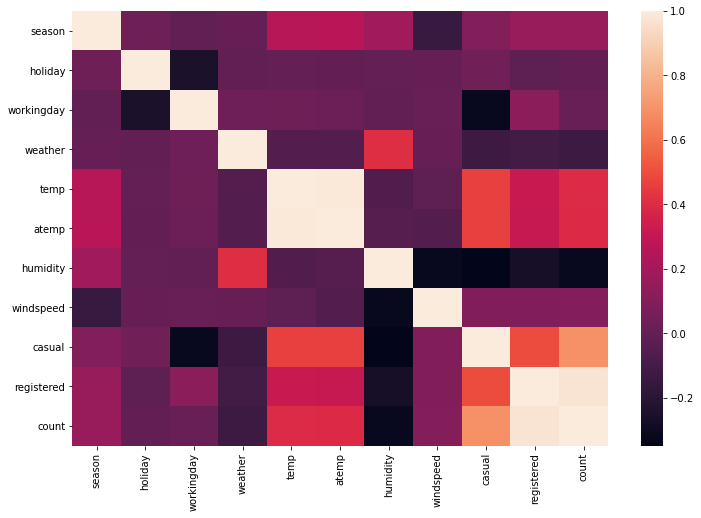

In [6]:
figure(figsize=(12, 8))
sns.heatmap(train.corr())

**Taking date as a fratures. Converted date columns to year, month, day, hour and weekday column**

In [7]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['weekday'] = train['datetime'].dt.weekday

Removing date column

In [8]:
train = train.drop('datetime', axis = 1)

Applying same conversion on test data also

In [9]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['weekday'] = test['datetime'].dt.weekday

In [10]:
test = test.drop('datetime', axis = 1)

Here temp, atemp, humidity and windspeed features available are not in binary form so using Normalization method for this four column

In [11]:
col = ['temp', 'atemp', 'humidity', 'windspeed']

In [12]:
for i in col:
    scaler = StandardScaler()
    train[col]=scaler.fit_transform(train[col])
    test[col]=scaler.transform(test[col])   

<AxesSubplot:>

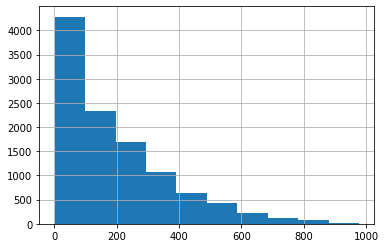

In [13]:
train['count'].hist()

Splitting data into X_train and y_train datasets

In [14]:
X_train = train.drop(['count', 'casual','registered'], axis = 1)
y_train = train['count']

In y_train data is in skewed form so using log transform to manage data

In [15]:
y_train = np.log(y_train.values)

checking final shape of train and test data

In [16]:
X_train.shape, y_train.shape, test.shape

((10886, 13), (10886,), (6493, 13))

Created random forest algorithm for predictions

In [17]:
model_rf = RandomForestRegressor(random_state=2021)

applying bagging regression concept for random forest algorithm

In [18]:
model_bg = BaggingRegressor(base_estimator = model_rf, random_state=2021,oob_score=True, max_features=X_train.shape[1], n_estimators = 15,
                             max_samples=X_train.shape[0])

fitting this model with random forest and bagging regression concept

In [19]:
model_bg.fit( X_train , y_train )

BaggingRegressor(base_estimator=RandomForestRegressor(random_state=2021),
                 max_features=13, max_samples=10886, n_estimators=15,
                 oob_score=True, random_state=2021)

Predicting results from above model

In [20]:
y_pred = model_bg.predict(test)

Taking anti log transform of predicted result

In [21]:
y_pred =np.exp(y_pred)

Creating submission file

In [22]:
submission = pd.DataFrame({ "datetime": sampsub.datetime, "count": y_pred})

In [23]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,13.186473
1,2011-01-20 01:00:00,5.388164
2,2011-01-20 02:00:00,3.880935
3,2011-01-20 03:00:00,3.024837
4,2011-01-20 04:00:00,2.543904


In [24]:
submission.to_csv("submission_random_forest_bagging.csv", index=False)